# Tarea 2 - Punto 4.b
## Marlon Farfan
## Daniel Rueda

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar
from matplotlib import rcParams

rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'

In [64]:
#Parámetros
a=1
m=1
A=np.sqrt(30)/a**(5/2)
x = np.linspace(0,1,100)
t = np.linspace(0,2e33,300)
X, T = np.meshgrid(x, t)

In [65]:
#Coeficientes
def c_n(n):
    if n%2==0:
        return 0
    else:
        return 4*A*np.sqrt(2)*a**(5/2)/(n**3*np.pi**3)
#Energías
def E_n(n):
    return hbar**2*n**2*np.pi**2/(2*m*a**2)

#Función de onda
def wave(x,n):
    return c_n(n)*np.sqrt(2/a)*np.sin(n*np.pi/a*x)

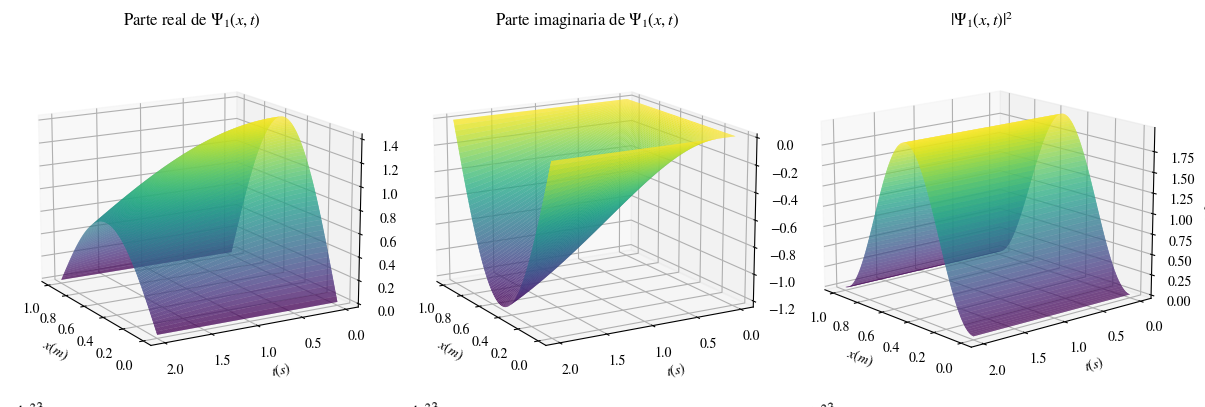

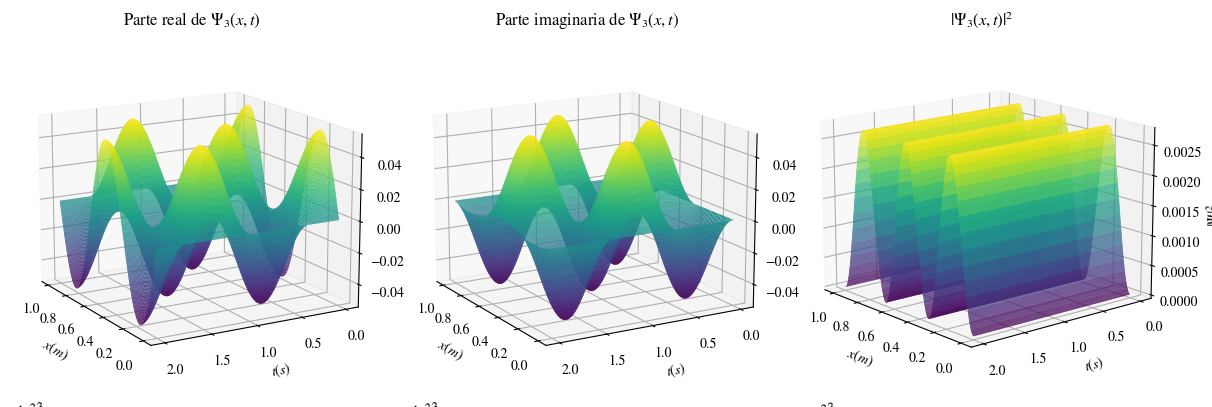

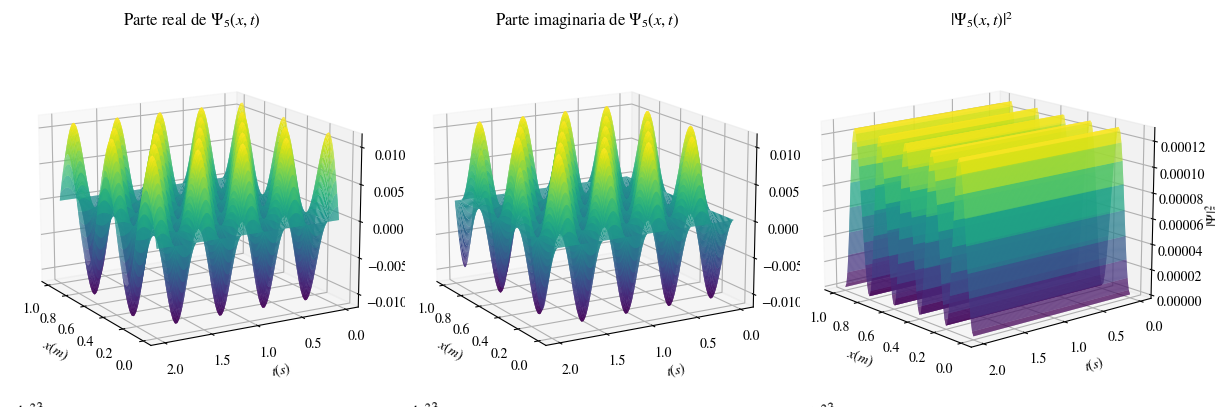

In [66]:
n_values = [1, 3, 5]
for i in n_values:
    plt.figure(figsize=(12, 4))  # Create a larger figure to hold three subplots horizontally

    # Parte real phi
    psi_r = wave(X, i) * np.cos(E_n(i) / hbar * T)
    # Parte imaginaria
    psi_i = -wave(X, i) * np.sin(E_n(i) / hbar * T)
    # Wave function norm^2
    psi_p = abs(psi_r + 1j * psi_i) ** 2

    # Parte real
    ax1 = plt.subplot(131, projection='3d')
    ax1.plot_surface(X, T, psi_r, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax1.set_xlabel('$x(m)$')
    ax1.set_ylabel('$t(s)$')
    ax1.set_zlabel(r'$\Psi_{}$'.format(i), rotation=0)
    ax1.view_init(15, 150)
    ax1.set_title('Parte real de '+r'$\Psi_{}(x,t)$'.format(i))

    # Parte imaginaria
    ax2 = plt.subplot(132, projection='3d')
    ax2.plot_surface(X, T, psi_i, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax2.set_xlabel('$x(m)$')
    ax2.set_ylabel('$t(s)$')
    ax2.set_zlabel(r'$\Psi_{}$'.format(i), rotation=90)
    ax2.view_init(15, 150)
    ax2.set_title('Parte imaginaria de '+r'$\Psi_{}(x,t)$'.format(i))

    # |Psi|^2
    ax3 = plt.subplot(133, projection='3d')
    ax3.plot_surface(X, T, psi_p, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax3.set_xlabel('$x(m)$')
    ax3.set_ylabel('$t(s)$')
    ax3.set_zlabel(r'$|\Psi|^2_{}$'.format(i), rotation=0)
    ax3.view_init(15, 140)
    ax3.set_title(r'$|\Psi_{}(x,t)|^2$'.format(i))
    plt.tight_layout() 
    plt.show()  


Anteriormente, se graficaron las funciones de onda para tres n's (1,3,5) junto a su distribución de probabilidad en función de la posición y el tiempo. Concretamente, se dividio la función de onda en su parte real e imaginaria. Para los tres n's, el componente posicional y temporal varía periodicamente, que es lo esperado (para n=1 puede cambiarse el rango de tiempo para que se aprecie mejor la oscilación). Ahora, note que a medida que n aumenta, la contribución a la probabilidad es cada vez menor. Esto tiene sentido, ya que en este caso el primer modo es el que más contribuye a la función de onda dada para el pozo de potencial; mientras que la contribución de los demás modos es muy poca (note que los coeficientes C_n son proporcionales a 1/n^3).